In [1]:
import numpy  as np
import pandas as pd
import itertools as it
import os, sys
import gzip
import re

import hicstraw
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
FD_DAT="/data/reddylab/Kuei/repo/Proj_CombEffect_ENCODE_FCC/data"
FD_DAT_OLD="/data/reddylab/Kuei/work/proj_combeffect_encode_fcc/source"
FD_RES_OLD="/data/reddylab/Kuei/work/proj_combeffect_encode_fcc/results_v4"

In [4]:
txt_fdiry = os.path.join(FD_DAT, "external", "hic_intact_K562_deep")
txt_fname = "inter.hic"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

hic   = hicstraw.HiCFile(txt_fpath)

print(hic)
print(hic.getGenomeID())
print(hic.getResolutions())

hg38
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10, 1]


In [5]:
txt_fdiry = os.path.join(FD_RES_OLD, "region", "annotation_crispri_hcrff")
txt_fname = "description.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep="\t")
vec = dat.Name
vec_txt_cnames = vec

In [6]:
txt_fdiry = os.path.join(FD_RES_OLD, "region", "annotation_crispri_hcrff")
txt_fname = "crispri_hcrff.casa.bed.gz"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep="\t", names=vec_txt_cnames)
dat

,Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Assay_Type,Assay_Label
0,chr11,5248847,5249047,chr11:5248847-5249047,1.068624,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
1,chr11,5248847,5249047,chr11:5248847-5249047,0.935770,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
2,chr11,5249847,5250847,chr11:5249847-5250847,1.890890,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
3,chr11,5249847,5250847,chr11:5249847-5250847,1.922956,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
4,chr11,5253147,5253547,chr11:5253147-5253547,1.330342,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
...,...,...,...,...,...,...,...,...,...,...
108,chrX,48786097,48786997,chrX:48786097-48786997,3.708137,.,GATA1,ENSG00000102145,CRISPRi-HCRFF,CRISPRi-HCRFF:GATA1
109,chrX,48786297,48786997,chrX:48786297-48786997,-1.425316,.,HDAC6,ENSG00000094631,CRISPRi-HCRFF,CRISPRi-HCRFF:HDAC6
110,chrX,48800197,48801297,chrX:48800197-48801297,2.398983,.,GATA1,ENSG00000102145,CRISPRi-HCRFF,CRISPRi-HCRFF:GATA1
111,chrX,48800297,48801097,chrX:48800297-48801097,1.396662,.,HDAC6,ENSG00000094631,CRISPRi-HCRFF,CRISPRi-HCRFF:HDAC6


In [29]:
txt_normalization = "RU"
num_resolution    = 2000
txt_chrom         = "chr8"
txt_metric        = "observed", #"oe",

def fun_get_matrix(hic, txt_chrom, num_start, num_end, txt_metric, num_resolution, txt_normalization):
    ###
    mat_object = hic.getMatrixZoomData(
        txt_chrom, 
        txt_chrom, 
        txt_metric,
        txt_normalization, 
        "BP", 
        num_resolution)

    ###
    mat_numpy = mat_object.getRecordsAsMatrix(
        int(num_start),
        int(num_end),
        int(num_start),
        int(num_end)
    )

    return mat_numpy

In [18]:
import matplotlib

(402, 402)


<Figure size 1200x1200 with 0 Axes>

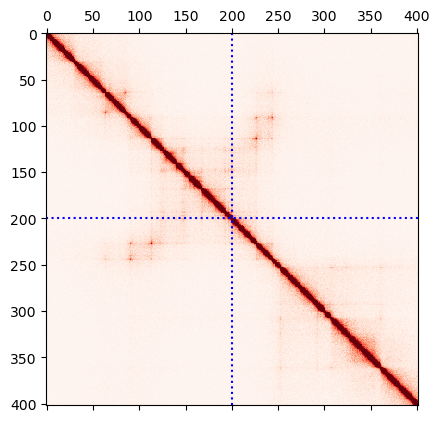

In [30]:
#gen = zip(dat.Chrom, dat.Start, dat.End, dat.Gene_Symbol)
#for txt_chrom, num_start, num_end, txt_gene in gen:
    #print(txt_chrom, num_start, num_end, txt_gene)

txt_chrom  = "chr11"
num_start  = 33944871 
num_end    = 33945471
num_margin = 200_000
num_resolution = 1_000
txt_metric = "observed"

num1 = num_start - num_margin
num2 = num_end   + num_margin

mat = fun_get_matrix(hic, txt_chrom, num1, num2, txt_metric, num_resolution, txt_normalization)

print(mat.shape)
plt.figure(figsize=(12, 12))
plt.matshow(mat, vmin=0, vmax=100, cmap = matplotlib.cm.Reds, interpolation = 'none')
plt.axhline(y=200, color = "blue", linestyle = ":")
plt.axvline(x=200, color = "blue", linestyle = ":")

In [25]:
vec = mat[200]
vec.shape

(402,)

In [38]:
num_margin     = 200_000
num_resolution =   1_000
txt_metric     = "observed"

lst = []
gen = zip(dat.Chrom, dat.Start, dat.End, dat.Gene_Symbol)

for txt_chrom, num_start, num_end, txt_gene in gen:
    print(txt_chrom, num_start, num_end, txt_gene)

    num1 = num_start - num_margin
    num2 = num_end   + num_margin
    mat = fun_get_matrix(hic, txt_chrom, num1, num2, txt_metric, num_resolution, txt_normalization)
    vec = mat[200]
    lst.append(vec)
    
lst_vec_virtual4c = lst

chr11 5248847 5249047 HBG1
chr11 5248847 5249047 HBG2
chr11 5249847 5250847 HBG1
chr11 5249847 5250847 HBG2
chr11 5253147 5253547 HBG1
chr11 5253147 5253547 HBG2
chr11 5253647 5254647 HBG1
chr11 5253647 5254647 HBG2
chr11 5269147 5271147 HBE1
chr11 5275247 5276247 HBE1
chr11 5275747 5276247 HBG2
chr11 5275847 5276247 HBG1
chr11 5279747 5281147 HBG1
chr11 5279747 5281147 HBG2
chr11 5280447 5281147 HBE1
chr11 5281347 5281947 HBG1
chr11 5281447 5281947 HBG2
chr11 5282047 5282647 HBG1
chr11 5282047 5282647 HBG2
chr11 5283047 5283447 HBG1
chr11 5283047 5283447 HBG2
chr11 5283847 5286747 HBG1
chr11 5283847 5286747 HBG2
chr11 5284147 5286047 HBE1
chr11 5287647 5288747 HBG1
chr11 5287647 5288747 HBG2
chr11 5287947 5288547 HBE1
chr11 5503747 5505947 HBE1
chr11 33869368 33870768 LMO2
chr11 33880468 33883368 LMO2
chr11 33937168 33938068 LMO2
chr11 33940268 33943268 LMO2
chr11 33943668 33946568 LMO2
chr11 33944868 33945268 CAT
chr11 33944871 33945471 CAPRIN1
chr11 33947368 33947868 LMO2
chr11 3405

In [37]:
type(vec)

numpy.ndarray

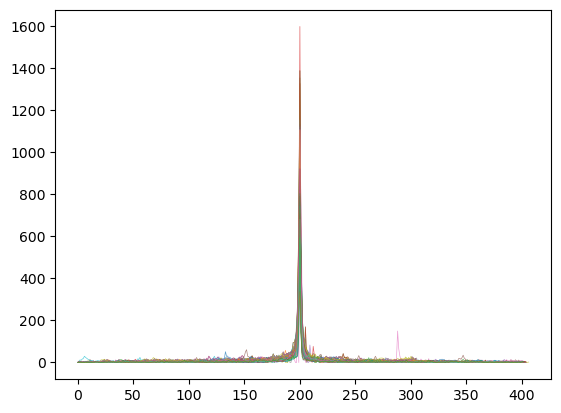

In [39]:
lst = lst_vec_virtual4c
for vec in lst:
    #vec[190:210] = 0
    plt.plot(vec, linewidth=0.5, alpha=0.7)
plt.show()

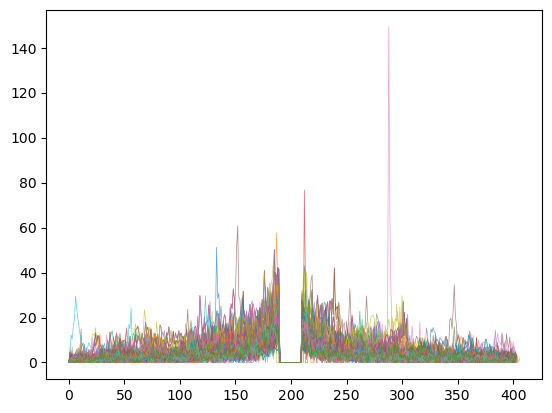

In [40]:
lst = list(lst_vec_virtual4c)
for vec in lst:
    vec[190:210] = 0
    plt.plot(vec, linewidth=0.5, alpha=0.7)
plt.show()

In [41]:
num_margin     = 200_000
num_resolution =   1_000
txt_metric     = "oe"

lst = []
gen = zip(dat.Chrom, dat.Start, dat.End, dat.Gene_Symbol)

for txt_chrom, num_start, num_end, txt_gene in gen:
    print(txt_chrom, num_start, num_end, txt_gene)


    num1 = num_start - num_margin
    num2 = num_end   + num_margin
    mat = fun_get_matrix(hic, txt_chrom, num1, num2, txt_metric, num_resolution, txt_normalization)
    vec = mat[200]
    lst.append(vec)
    
lst_vec_virtual4c = lst

chr11 5248847 5249047 HBG1
chr11 5248847 5249047 HBG2
chr11 5249847 5250847 HBG1
chr11 5249847 5250847 HBG2
chr11 5253147 5253547 HBG1
chr11 5253147 5253547 HBG2
chr11 5253647 5254647 HBG1
chr11 5253647 5254647 HBG2
chr11 5269147 5271147 HBE1
chr11 5275247 5276247 HBE1
chr11 5275747 5276247 HBG2
chr11 5275847 5276247 HBG1
chr11 5279747 5281147 HBG1
chr11 5279747 5281147 HBG2
chr11 5280447 5281147 HBE1
chr11 5281347 5281947 HBG1
chr11 5281447 5281947 HBG2
chr11 5282047 5282647 HBG1
chr11 5282047 5282647 HBG2
chr11 5283047 5283447 HBG1
chr11 5283047 5283447 HBG2
chr11 5283847 5286747 HBG1
chr11 5283847 5286747 HBG2
chr11 5284147 5286047 HBE1
chr11 5287647 5288747 HBG1
chr11 5287647 5288747 HBG2
chr11 5287947 5288547 HBE1
chr11 5503747 5505947 HBE1
chr11 33869368 33870768 LMO2
chr11 33880468 33883368 LMO2
chr11 33937168 33938068 LMO2
chr11 33940268 33943268 LMO2
chr11 33943668 33946568 LMO2
chr11 33944868 33945268 CAT
chr11 33944871 33945471 CAPRIN1
chr11 33947368 33947868 LMO2
chr11 3405

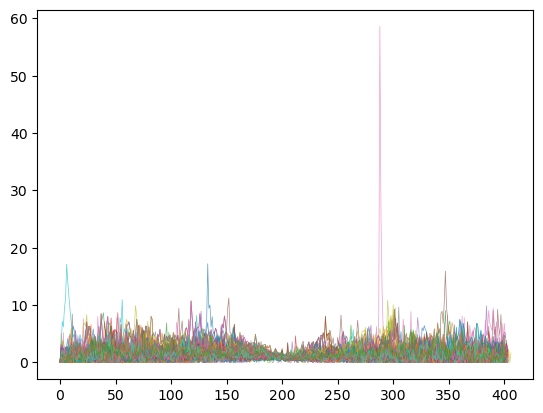

In [42]:
lst = lst_vec_virtual4c
for vec in lst:
    #vec[190:210] = 0
    plt.plot(vec, linewidth=0.5, alpha=0.7)
plt.show()

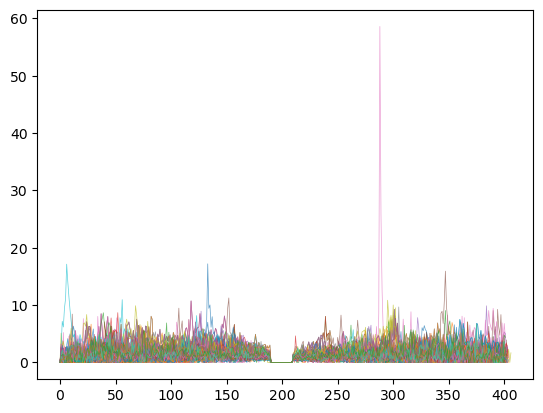

In [43]:
lst = lst_vec_virtual4c
for vec in lst:
    vec[190:210] = 0
    plt.plot(vec, linewidth=0.5, alpha=0.7)
plt.show()